# Are Fandango Ratings Still Inflated?
- Walt Hickey wrote a data journalism piece in FiveThirtyEight concluding that Fandango inflated their movie ratings by rounding up to a half or whole star by analyzing the actual rating for 209 films played in theaters in 2015 and recieved 30+ reviews, which he found in the HTML of the page
<br><br>
- The **goal of this project** is to determine if Fandango corrected their rating system since Hickey's analysis
<br><br>
- [Hickey's Data](https://github.com/fivethirtyeight/data/tree/master/fandango)
- [Dataquest Data](https://github.com/mircealex/Movie_ratings_2016_17)

## Part II - Understanding the Data

##### Explore Data Sets

In [1]:
import pandas as pd
old = pd.read_csv('fandango_score_comparison.csv')
old;

In [2]:
new = pd.read_csv('movie_ratings_16_17.csv')
new;

##### Isolate Columns that Relate to Fandango's Ratings from the Data Sets

In [3]:
oldf = old[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
            'Fandango_votes', 'Fandango_Difference']].copy()
oldf;

In [4]:
newf = new[['movie', 'year', 'fandango']].copy()
newf;

[Why you should always make a copy if the intension is not to change the original df or if a version of the original df is desired](https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas)

##### Define Population of Interest
- The population is all the movies in the Fandango system after Fandango formally responded to Hickey's analysis

##### Decipher if the Two Samples are Representative of the Population


**Old Data (Hickey)**
- 'fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.'
<br><br>
- **The sample is part of the population, however is not a random sample as it is from a specific year (2015) and has at least 30 ratings**

**New Data (Dataquest)**
- 'movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.'
<br><br>
- **The sample is part of the population as well and although it covers an extra year of movies, it also is not a random sample because it also only represents popular movies.**


||Old|New|
|:---:|:---:|:---:|
|**Sample Size**|209|214|
|**Movie Released**|2015|2016 & 2017|
|**Requirements**|Other ratings from specific websites &<br> at least 30 fan reviews on Fandango|Most popular movies <br>(with a significant number of votes)|

- What is a 'significant' number of votes?
    - Number of votes are not in the data set provided. Could go into the website, however it is has been nearly 3 years since the data was extracted and the number of votes could have significantly changed

## Part III - Changing the Goal of our Analysis

- The new population will be "popular" movies
- This change in population should not hurt our main goal, which is determining if Fandango's rating system has changed after Hickey's analysis, because both sets are similar in creteria and have enough information to continue the analysis
- To check answers, the Dataquest data set will only be popular movies released in 2016 instead of 2016 and 2017

In [5]:
oldf = oldf[oldf['FILM'].str.contains(pat='(2015)')].copy();

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [6]:
oldf.shape[0]==oldf.FILM.str.extractall(pat='(2015)').shape[0]

True

- The code above tells if the length of the data set is the same length of the data set that contains only 2015 valus, if True it means that all the movies are from 2015<br><br>
[Working With Text Data](https://www.kaggle.com/hamelg/python-for-data-15-working-with-text-data)

In [7]:
newf = newf[newf['year']==2016].copy()

In [8]:
newf['year'].value_counts()

2016    191
Name: year, dtype: int64

## Part IV - Isolating the Samples We Need

##### Do Movies in Hickey's Data have at least 30 Fan Ratings

In [9]:
oldf.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,129.000000,129.000000,129.000000,129.000000
mean,4.085271,3.846512,3761.891473,0.238760
std,0.538096,0.505446,6543.601748,0.152741
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,210.000000,0.100000
50%,4.000000,3.900000,1415.000000,0.200000
75%,4.500000,4.200000,4045.000000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


- The minimum value for Fandango's number of votes is 35 so it passes the test

##### Do Movies in DQ's Data have at least 30 Fan Ratings

- Hard to aquire data for this data set as the data set neither include the number of votes nor describes the minimum number of votes required to be considered in the data set
- Some alternatives is sampling the data and checking the current votes on the Fandango website, however the number of votes when the data was collected verse now is most likely going to be different
    - If the website has a feature to let one examine the current votes on a a specific date, that is a workaround
- As to how many movies to sample, the key suggests 10 is an adequate number and if 8 of the 10 movies have at least 30 fan votes, the data set should be usable 
- [Fandango Website](https://www.fandango.com/)

In [10]:
newf.sample(10,random_state=0)

,movie,year,fandango
121,Nerve,2016,4.0
83,Jane Got a Gun,2016,3.5
179,The Great Wall,2016,4.0
108,Mechanic: Resurrection,2016,4.0
136,Resident Evil: The Final Chapter,2016,4.0
80,Inferno,2016,3.5
22,Ben-Hur,2016,4.0
137,Ride Along 2,2016,4.0
160,The Angry Birds Movie,2016,4.0
8,Allied,2016,4.0


- Unfortunately Fandango has removed their reviews and the information that comes with this and replaced it with Rotten Tomatoes scores
- [Find out more on how Rotten Tomatoes rates in their article](https://editorial.rottentomatoes.com/article/introducing-verified-audience-score/)
- Instead we will rely on the answer solution to verify the quality of the data as it was released prior to the article above

## Part V - Comparing Distribution Shapes for 2015 and 2016

###### 2015 and 2016 Kernal Density Plots

['seaborn-darkgrid', 'seaborn-colorblind', 'dark_background', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-dark', 'seaborn-ticks', 'seaborn-talk', 'bmh', 'seaborn-deep', 'seaborn-whitegrid', 'classic', 'seaborn-poster', 'ggplot', 'grayscale', 'seaborn-pastel', 'seaborn-white', 'fivethirtyeight', 'seaborn-bright', 'seaborn-dark-palette']


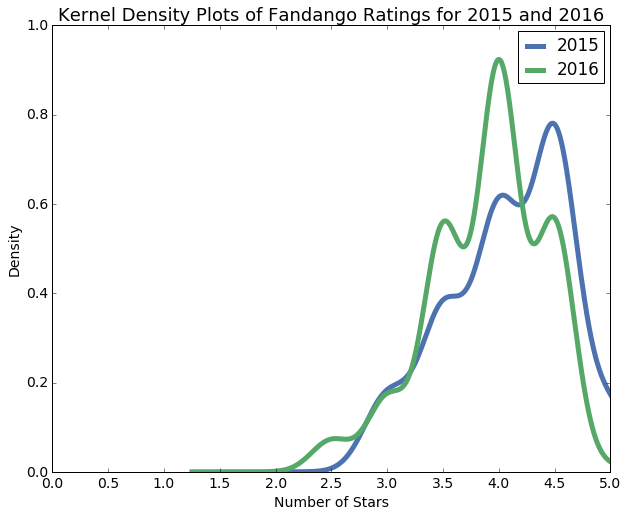

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

print(plt.style.available)
plt.style.use('seaborn-deep')

oldf['Fandango_Stars'].plot.kde(label = '2015',\
                    legend=True, figsize=(10,8),\
                    linewidth=5)
newf.fandango.plot.kde(label = '2016', legend=True,\
                      linewidth=5)

plt.title('Kernel Density Plots of Fandango Ratings for 2015 and 2016',\
         fontsize = 18)

plt.xlabel('Number of Stars')

plt.xticks(np.arange(0,5.5, step = 0.5))
plt.xlim([0,5])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

[How to change the font size on a matplotlib plot](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)
<br><br>
[Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/tutorials/introductory/customizing.html)

##### Insight on Kernel Density Plots

- The 2015 plot appears to be left skewed and the 2016 plot appears to resemble a normal distribution <br><br>
- The 2016 plot seems to have a higher density of lower star values and it thus may have lower values for the same percentile rank as the 2015 data <br><br>
- Assuming that the 2016 fan rating is overall lower than the 2016 data, it would suggest that there has been a change between Fandango's rating for popular movies in 2015 and Fandango's rating for popular movies in 2016

## Part VI - Comparing Relative Frequencies

##### Frequency Distribution Tables
- Although the samples have a similar number of values, it is not the same and thus relative frequencies with percentages would be more appropriate and readable

In [12]:
ovc=oldf['Fandango_Stars'].value_counts(normalize=True).sort_index()*100
ovc

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
nvc=newf['fandango'].value_counts(normalize=True).sort_index()*100
nvc

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

- [Python Pandas: Convert “.value_counts” output to dataframe](https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe)
ovcdf=ovc.rename_axis('Stars').reset_index(name='perc')
nvcdf=nvc.rename_axis('Stars').reset_index(name='perc')
- [Better visualization of Pie charts by MatPlotLib](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)
- [Multiple pie charts using matplotlib](https://stackoverflow.com/questions/25205247/multiple-pie-charts-using-matplotlib/25205547)

##### Insight on Frequency Distributions Tables

- Looking at a more granular information, it is clear that there a difference between the two distribution shapes
    - The 2015 data progressively grows in the percentage of values as the value of the rating grows from 3-4.5 stars
    - On the other hand, the 2016 data peaks at 4 stars and has almost the same percentage half a star above and below 4 stars and the values on the outer ends of 3.5 and 4.5 decreases <br><br>
- About 40% is the highest percentage for a single rating value for both data sets
    - For the 2015 and 2016 data the value with about 40% are 4.5 and 4.0 stars, respectively <br><br>
- It is clear by examinig the frequency tables that the 2016 data has a higher frequency of lower values than the 2015 data does

## Part VII - Determining the Direction of the Change

##### Mean, Median and Mode Computation

In [14]:
# print('2015 Data')
# print('mean: ' + str(oldf['Fandango_Stars'].mean().round(1)))     
# print('median: ' + str(oldf['Fandango_Stars'].median()))     
# print('mode: ' + str(oldf['Fandango_Stars'].mode()[0]))  
# print('\n ')
# print('2016 Data')
# print('mean: ' + str(newf['fandango'].mean().round(1)))     
# print('median: ' + str(newf['fandango'].median()))     
# print('mode: ' + str(newf['fandango'].mode()[0])) 

o = oldf['Fandango_Stars']
n = newf['fandango']
mmm = pd.DataFrame()
mmm['2015'] = [o.mean(),o.median(),o.mode()[0]]
mmm['2016'] = [n.mean(),n.median(),n.mode()[0]]
mmm['dif']=mmm['2015']-mmm['2016']
mmm.index = ['mean','median','mode']
print(mmm.round(2))
      

        2015  2016  dif
mean    4.09  3.89  0.2
median  4.00  4.00  0.0
mode    4.50  4.00  0.5


##### Metric Comparison
- The mean is about 0.2 stars higher in the 2015 data set which is about a 4 percent difference
- The median is the same, which is not very telling in this case as the possible range of stars is the same for both data sets
- The mode for the 2015 data is half a star higher than the mode for the 2016 data, which means that 4.5 and 4.0 stars were the most frequent rating for the 2015 and 2016 data, respectively
    - This was also indicated in the frequency distribution tables
   

##### Grouped Comparative Bar Plot

In [15]:
gbp = mmm.iloc[:,:2]
gbp = gbp.stack().reset_index()
gbp = gbp.rename(columns={'level_0':'stat','level_1':'year',0:'rating'})
gbp

,stat,year,rating
0,mean,2015,4.085271
1,mean,2016,3.887435
2,median,2015,4.000000
3,median,2016,4.000000
4,mode,2015,4.500000
5,mode,2016,4.000000


[how to convert column names into column values in pandas - python](https://stackoverflow.com/questions/38241933/how-to-convert-column-names-into-column-values-in-pandas-python)<br>
[Set column names when stacking pandas DataFrame](https://stackoverflow.com/questions/32998893/set-column-names-when-stacking-pandas-dataframe) <br>
[seaborn barplot for nested grouping by two variables](https://seaborn.pydata.org/generated/seaborn.barplot.html)


['#4c72b0',
 '#55a868',
 '#c44e52',
 '#8172b2',
 '#ccb974',
 '#64b5cd',
 '#4c72b0',
 '#55a868',
 '#c44e52',
 '#8172b2']

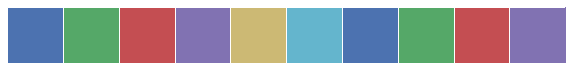

In [17]:
#extracting seaborn deep palette hex numbers
import seaborn as sns
sns.palplot(sns.color_palette('deep', 10))
pal = sns.color_palette('deep',10)
pal.as_hex()

[Extract RGB or 6 digit code from Seaborn palette](https://stackoverflow.com/questions/38249454/extract-rgb-or-6-digit-code-from-seaborn-palette) <br>
[seaborn palettes](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)

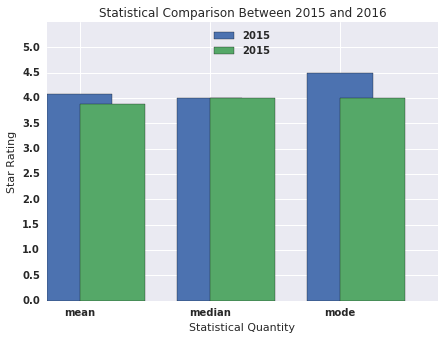

In [25]:
#also works, not as aesthetically pleasing
    # import seaborn as sns
    # g = sns.barplot(x='stat',y='rating',hue='year',data=gbp)


#learning from key
plt.style.use('seaborn-deep')
df = mmm.iloc[:,:2]
df['2015'].plot.bar(color = '#4c72b0', align='center',label='2015')
df['2016'].plot.bar(color = '#55a868', align='edge',label='2015',
                   rot = 0, figsize = (7,5))

plt.title('Statistical Comparison Between 2015 and 2016')
plt.yticks(np.arange(0,5.5,0.5))
plt.ylim(0,5.5)
plt.ylabel('Star Rating')
plt.xlabel('Statistical Quantity')
plt.legend(framealpha = 0, loc = 'upper center')

## Part VIII - Conclusion
- The average rating for popular movies showed to decrease from 2015 to 2016
- The shape of the distributions for both data sets were also visibly different
- These two differences make it possible that the changes were caused by Fandango changing their system, however there are two many variables involved and not enough evidence to say that the change is due to a change in Fandango's system